<a href="https://colab.research.google.com/github/alperbozoglu/LectureNotes/blob/main/ArtWorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab ortamına uygun hale getirilmiş kod
from google.colab import drive
import os
import cv2
import numpy as np

# Google Drive'ı bağlama
drive.mount('/content/drive')

# Klasör yolunu belirleme
path = "/content/drive/MyDrive/ColabNotebooks/Ressam/"
folderNames = os.listdir(path)

# Veri hazırlama
XSample, ySample = [], []
for i, folderName in enumerate(folderNames):
    folderPath = os.path.join(path, folderName)
    for file in os.listdir(folderPath):
        filePath = os.path.join(folderPath, file)
        if os.path.isfile(filePath):
            img = cv2.resize(cv2.imread(filePath), (128, 128), interpolation=cv2.INTER_LINEAR) / 255.0
            XSample.append(np.asarray(img))
            ySample.append(i)

# NumPy dizilerine dönüştürme
XSample = np.array(XSample)
ySample = np.array(ySample)

# Boyutları yazdırma
print(XSample.shape)
print(ySample.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(825, 128, 128, 3)
(825,)


In [ ]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(XSample,ySample, test_size=10, random_state=0)

XTrain,XVal,yTrain,yVal=train_test_split(XTrain,yTrain,test_size=0.11,random_state=0)

print(XTrain.shape)
print(XTest.shape)
print(XVal.shape)

(725, 128, 128, 3)
(10, 128, 128, 3)
(90, 128, 128, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(256,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4,activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,372,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,675,588 (29.28 MB)

 Trainable params: 7,675,460 (29.28 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history=model.fit(XTrain,yTrain,epochs=20,validation_data=(XVal,yVal))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 ━━━━━━━━━━━━━━━━━━━━ 166s 7s/step - accuracy: 0.3326 - loss: 1.6764 - val_accuracy: 0.5667 - val_loss: 3.3813
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.5963 - loss: 1.0481 - val_accuracy: 0.3222 - val_loss: 2.9852
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 209s 7s/step - accuracy: 0.6587 - loss: 0.9402 - val_accuracy: 0.5667 - val_loss: 4.4565
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 193s 7s/step - accuracy: 0.7093 - loss: 0.8030 - val_accuracy: 0.5889 - val_loss: 1.0364
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.7342 - loss: 0.7912 - val_accuracy: 0.5667 - val_loss: 1.1577
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 213s 7s/step - accuracy: 0.7220 - loss: 0.7492 - val_accuracy: 0.5667 - val_loss: 1.5564
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 194s 7s/step - accuracy: 0.7759 - loss: 0.6726 - val_accuracy: 0.4111 - val_loss: 1.6536
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.8133 - loss: 0.5632 - val_accuracy: 0.6667 - val_loss: 0.

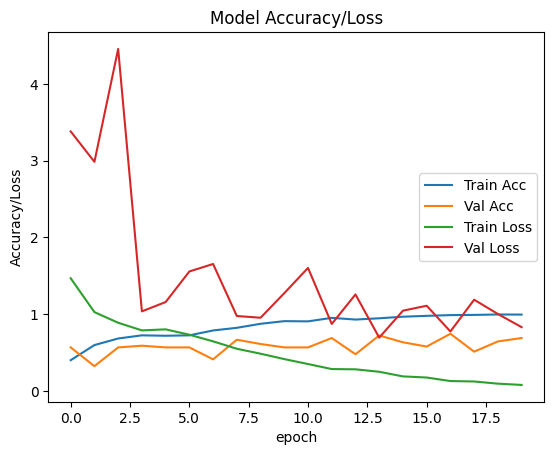

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Accuracy/Loss")
plt.ylabel("Accuracy/Loss")
plt.xlabel("epoch")
plt.legend(["Train Acc","Val Acc","Train Loss","Val Loss"],loc="center right")
plt.show()